# Introduction
Take advantage of Kaggle's Home Credit Default Risk competition to practice solving and analyzing tasks that are close to real data.


Home Credit Default Risk | Kaggle


In Week 4, we will learn and estimate using machine learning methods. To prepare for this, we will conduct data exploration (EDA) in Week 3.

In [1]:
# Predefines and Imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Problem 1
## Understanding the content of the competition

1. What kind of company is Home Credit?
- Consumer Finance Company (Loan)

2. What is expected in this competition?
- Predict clients' repayment abilities through machine learning and data analysis to help Home credit better aproach and provide customer with the aproriate service.

3. What are the benefits companies can gain by predicting this?
- Better customer service
- More customer

# Problem 2
## Understanding the overview of data

### Loading and Overview

In [2]:
credit_info = pd.read_csv('creditinfo_train.csv')
total_entries = credit_info.shape[0]
total_columns = credit_info.shape[1]
print(f'data rows: {total_entries}, data cols: {total_columns}')
credit_info.head()

data rows: 307511, data cols: 122


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Total Entries: 307511 

### Data Information

In [3]:
credit_info.info(verbose=True, show_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

### Description

In [4]:
credit_info.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Missing Value Check

In [5]:
def normalized_null_count(df):
    null_count = df.isnull().sum()
    normalized = null_count / null_count.mean()
    return normalized
null_ratio = normalized_null_count(credit_info)
print('Missing Ratio')
null_ratio[null_ratio>0.0]

Missing Ratio


AMT_ANNUITY                   0.000160
AMT_GOODS_PRICE               0.003706
NAME_TYPE_SUITE               0.017222
OWN_CAR_AGE                   2.704991
OCCUPATION_TYPE               1.284867
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.553438
AMT_REQ_CREDIT_BUREAU_WEEK    0.553438
AMT_REQ_CREDIT_BUREAU_MON     0.553438
AMT_REQ_CREDIT_BUREAU_QRT     0.553438
AMT_REQ_CREDIT_BUREAU_YEAR    0.553438
Length: 67, dtype: float64

### Dropping columns with too much nulls

In [6]:

columns_to_drop = credit_info.columns[null_ratio > 0.5] # Let's drop columns with more than 50% missing
credit_info = credit_info.drop(columns_to_drop, axis= 1)
print(f'Dropped {len(columns_to_drop)} columns, went from {total_columns} to {credit_info.shape[1]} columns')
print(f'Remaining columns: {credit_info.columns.values}')

Dropped 57 columns, went from 122 to 65 columns
Remaining columns: ['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'FLAG_MOBIL' 'FLAG_EMP_PHONE'
 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE' 'FLAG_EMAIL'
 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT' 'REGION_RATING_CLIENT_W_CITY'
 'WEEKDAY_APPR_PROCESS_START' 'HOUR_APPR_PROCESS_START'
 'REG_REGION_NOT_LIVE_REGION' 'REG_REGION_NOT_WORK_REGION'
 'LIVE_REGION_NOT_WORK_REGION' 'REG_CITY_NOT_LIVE_CITY'
 'REG_CITY_NOT_WORK_CITY' 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE'
 'EXT_SOURCE_2' 'OBS_30_CNT_SOCIAL_CIRCLE' 'DEF_30_CNT_SOCIAL_CIRCLE'
 'OBS_60_CNT_SOCIAL_CIRCLE' 'DEF_60_CNT_SOCIAL_CIRCLE'
 'DAYS_LAST_PHONE_CHANGE' 'F

### Drop Rows

In [7]:
credit_info = credit_info.dropna()
print(f'Dropped {total_entries - credit_info.shape[0]} rows, went from {total_entries} to {credit_info.shape[0]} rows')

Dropped 2980 rows, went from 307511 to 304531 rows


### Remaining Data

In [22]:
credit_info.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


### Target Variable:
- From the description and references, the target variable of our data set is the "TARGET" column.


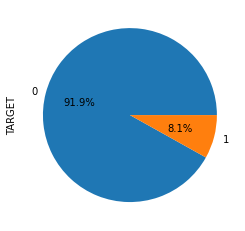

In [9]:
credit_info['TARGET'].value_counts().plot.pie(autopct='%1.1f%%');

# Problem 3
## Defining Problem

### Here's my issues/ questions for the data that i will solve later
- What does this bank's customer "look like"? Their attributes' distribution?
- What are relating attributes to our target variable?
- What are dependent attributes that can affect our prediction of the target variable?

# Problem 4
## Data Exploration

## A look at the customer's features
### I will visualize the following features:
- Gender
- Own Car?
- Child Count
- Total Income
- Income Type 
- Education Type 
- Family Status 
- Housing Type
- Contract Type
- Accompany When person apply for loan
- Loan Credit
- Load Annuity

### Gender

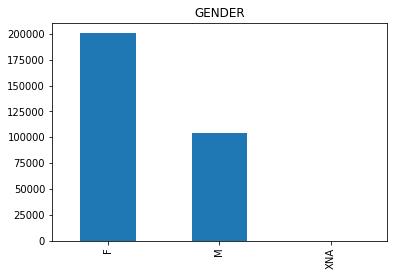

In [10]:
credit_info['CODE_GENDER'].value_counts().plot.bar(title = 'GENDER');

### Car Ownage?

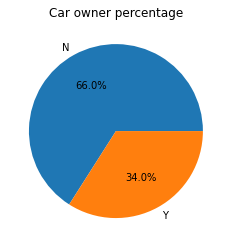

In [11]:
credit_info['FLAG_OWN_CAR'].value_counts().plot.pie(label = '',title = 'Car owner percentage', autopct = '%1.1f%%');

### Child Count

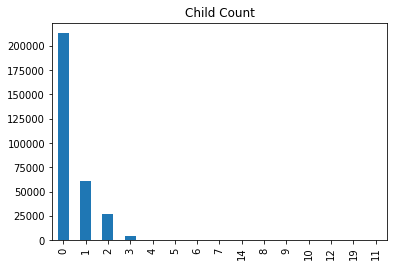

In [12]:
credit_info['CNT_CHILDREN'].value_counts().plot.bar(title = 'Child Count');

### Total Income

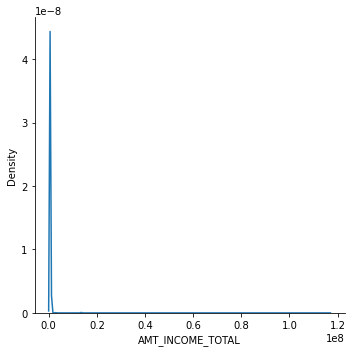

In [32]:
sns.displot(credit_info, x = 'AMT_INCOME_TOTAL',kind="kde");

### Income Type

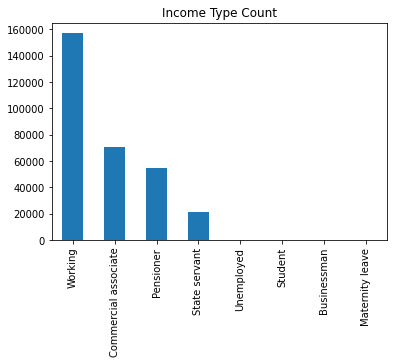

In [18]:
credit_info['NAME_INCOME_TYPE'].value_counts().plot.bar(title = 'Income Type Count');

### Education Type

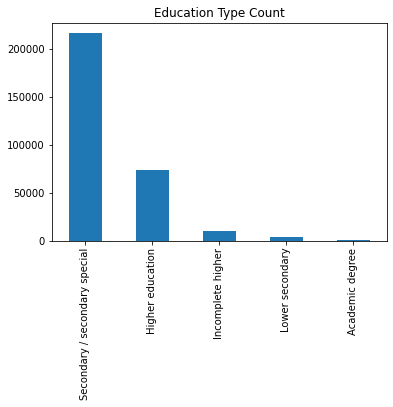

In [19]:
credit_info['NAME_EDUCATION_TYPE'].value_counts().plot.bar(title = 'Education Type Count');

### Family Status

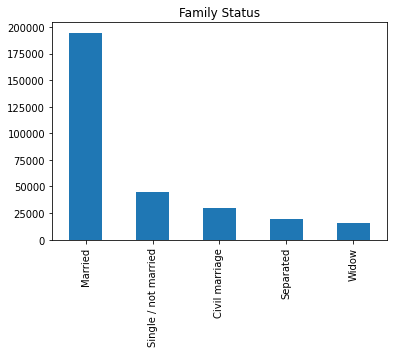

In [21]:
credit_info['NAME_FAMILY_STATUS'].value_counts().plot.bar(title = 'Family Status');

### Housing Type

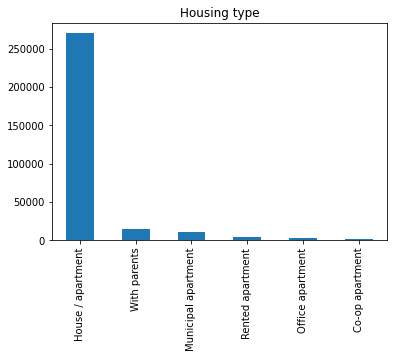

In [23]:
credit_info['NAME_HOUSING_TYPE'].value_counts().plot.bar(title = 'Housing type');

### Contract Type

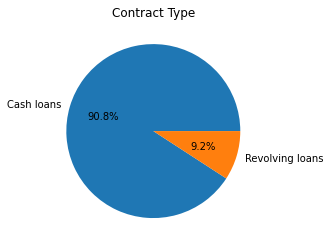

In [29]:
credit_info['NAME_CONTRACT_TYPE'].value_counts().plot.pie(label = '',title = 'Contract Type', autopct = '%1.1f%%');

### Loan Application Accompany

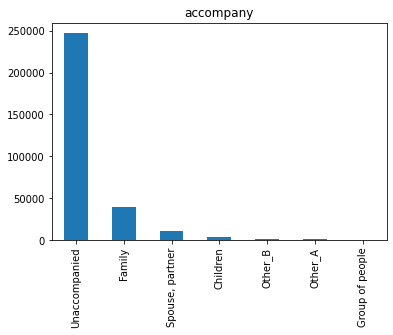

In [31]:
credit_info['NAME_TYPE_SUITE'].value_counts().plot.bar(label = '', title = 'accompany');

### Loan Credit

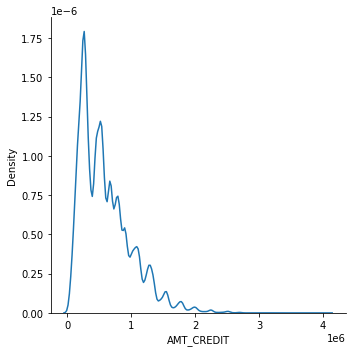

In [36]:
sns.displot(credit_info, x = 'AMT_CREDIT', kind = 'kde');

### Loan Annuity

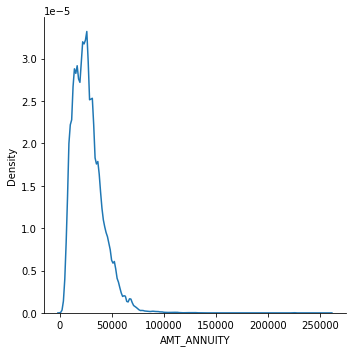

In [38]:
sns.displot(credit_info, x = 'AMT_ANNUITY', kind= 'kde');

### Conclusions: observations
- most customers are femail and have car
- more than 90% use cash loan, not revolving loan
- Most have no child, others have 2,3 maximum 4
- Most are married, live in normal housing and is Secondary income class
- Most apply to loan alone (unacompanied)
- Credit loan focus on 500000$ - 1mil loan 
- Annuity loan focus on 250000$ - 500000$ loan

## Correlation Analysis

### Attributes relating to target variable

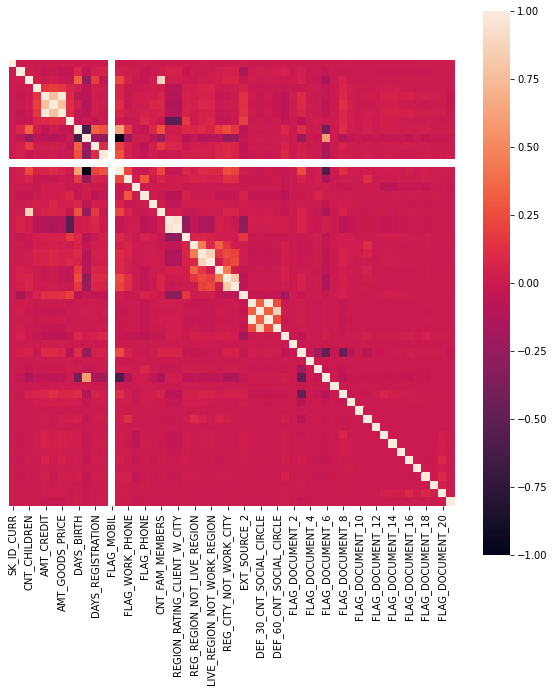

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(data = credit_info.corr(),vmin  =-1, vmax = 1, square= True, yticklabels= False);

In [56]:
print(f'Target Correlation: ')
target_correlations = credit_info.corr()['TARGET']
target_correlations

Target Correlation: 


SK_ID_CURR                    -0.002170
TARGET                         1.000000
CNT_CHILDREN                   0.019236
AMT_INCOME_TOTAL              -0.003625
AMT_CREDIT                    -0.030335
AMT_ANNUITY                   -0.012630
AMT_GOODS_PRICE               -0.039549
REGION_POPULATION_RELATIVE    -0.036997
DAYS_BIRTH                     0.078636
DAYS_EMPLOYED                 -0.045168
DAYS_REGISTRATION              0.042265
DAYS_ID_PUBLISH                0.051397
FLAG_MOBIL                          NaN
FLAG_EMP_PHONE                 0.046223
FLAG_WORK_PHONE                0.028366
FLAG_CONT_MOBILE               0.000236
FLAG_PHONE                    -0.023885
FLAG_EMAIL                    -0.001667
CNT_FAM_MEMBERS                0.009185
REGION_RATING_CLIENT           0.058904
REGION_RATING_CLIENT_W_CITY    0.060900
HOUR_APPR_PROCESS_START       -0.023884
REG_REGION_NOT_LIVE_REGION     0.005634
REG_REGION_NOT_WORK_REGION     0.007079
LIVE_REGION_NOT_WORK_REGION    0.002963


In [59]:
print('Attributes Relating with TARGET:')
target_correlations[target_correlations.abs()>0.5]

Attributes Relating with TARGET:


TARGET    1.0
Name: TARGET, dtype: float64

## Conclusion:
- It seems that there are no values that directly correlate to our target
- Or it's because of the fact that our TARGET is a categorical variable rather than a nomial value.
- So maybe using person correlation is not the way to go.

# Problem 5
## Posting to kaggle

### This makes no sense given the tiny scope and poor quality of this notebook.
So i opt for the no solution.